### 1. How to define matplot, tensorflow, numpy, keras datasets?

In [34]:
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets

### 2. How to load mnist datasets?

In [35]:
mnist = datasets.mnist

In [36]:
(x_train,x_test),(y_train,y_test) = mnist.load_data()

### 3.How to chane the shape?

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
_x_train = x_train.reshape(60000,28,28,1)

In [39]:
_x_train.shape

(60000, 28, 28, 1)

#### 04. What's the parameter of CNN layer?

filters = layer's output     
kernal_size = filter weight size    
strides = how many pixel you will jump     
padding = "VALID"- no zero padding, "SAME" - include zero padding    
activation = what activation, best is 'relu'    

### 5.  How to visualize image after CNN? 

#### 5.1 How to change data shape (1,28,28,1) ? 

In [40]:
image = _x_train[0]

In [41]:
image.shape

(28, 28, 1)

In [42]:
_image = image.reshape(1,28,28,1)

In [43]:
_image.shape

(1, 28, 28, 1)

In [44]:
_image = tf.cast(_image,dtype=tf.float32)

In [45]:
_image.dtype

tf.float32

In [46]:
_image.shape

TensorShape([1, 28, 28, 1])

####  5.2 How to make CNN Layer?

##### 5-2-1 Include relu activation function

In [47]:
relu_layers = tf.keras.layers.Conv2D(filters=3,kernel_size=(3,3),strides=(1,1),padding='SAME',activation='relu')

#### 5-2-2 exclude relu activation function

In [48]:
normal_layers = tf.keras.layers.Conv2D(3,3,1,'SAME')

In [49]:
relu_output = relu_layers(_image)

In [50]:
normal_output = normal_layers(_image)

#### 5-2-3 How to comapre raw, cnn, cnn include rele

Text(0.5, 1.0, 'relu output images')

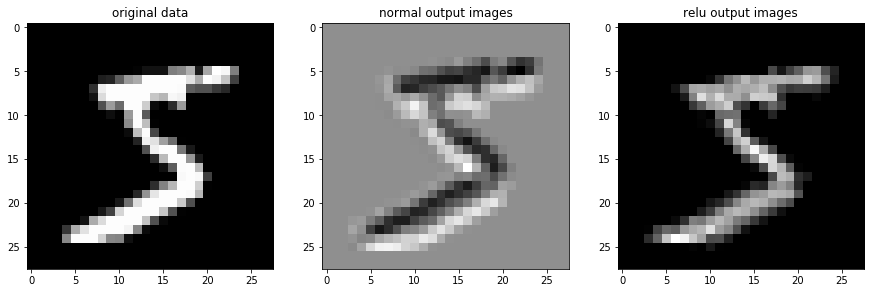

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(_image[0,:,:,0],'gray')
plt.title("original data")

plt.subplot(1,3,2)
plt.imshow(normal_output[0,:,:,0],'gray')
plt.title("normal output images")

plt.subplot(1,3,3)
plt.imshow(relu_output[0,:,:,0],'gray')
plt.title("relu output images")


### 6. How to visualize weights ? 

##### 6.1 get_weigts()

In [52]:
normal_weight= normal_layers.get_weights()

In [53]:
relu_weight = relu_layers.get_weights()

#### 6.2 weight[0] - weight / weight[1] - bias

In [54]:
len(normal_weight)

2

In [55]:
normal_weight[0].shape

(3, 3, 1, 3)

In [56]:
normal_weight[1].shape

(3,)

#### 6.3 How to Visualize weights using histogram?

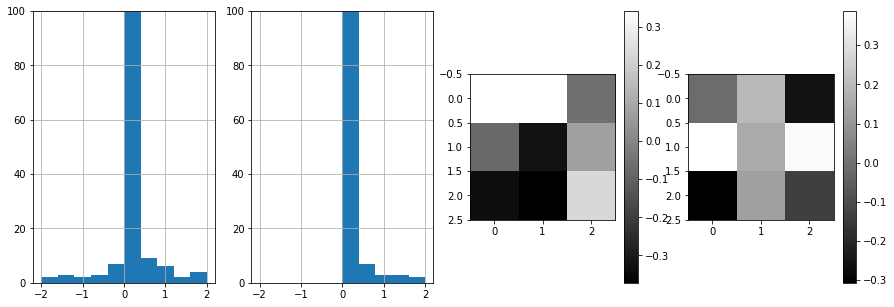

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.hist(normal_output.numpy().ravel(),range=[-2,2])
plt.ylim(0,100)
plt.grid()

plt.subplot(1,4,2)
plt.hist(relu_output.numpy().ravel(),range=[-2,2])
plt.ylim(0,100)
plt.grid()

plt.subplot(1,4,3)
plt.imshow(normal_weight[0][:,:,0,0],'gray')
plt.colorbar()

plt.subplot(1,4,4)
plt.imshow(relu_weight[0][:,:,0,0],'gray')
plt.colorbar()

### 7.1 How to make MAXPooling?

In [58]:
maxpooling = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='SAME')
output = maxpooling(relu_output)

#### 7.2 How to draw MAX Pooling results with weight distribution?

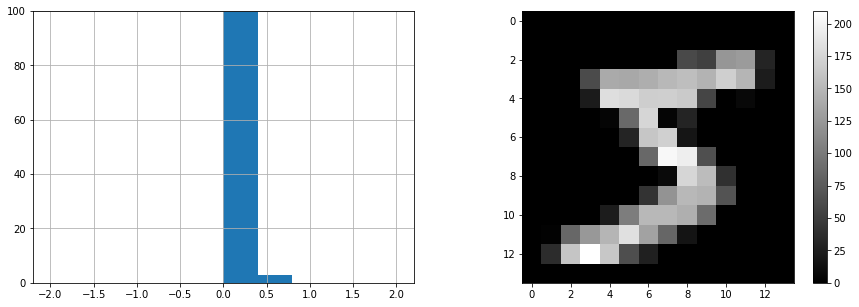

In [59]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(output.numpy().ravel(),range = [-2,2])
plt.ylim([0,100])
plt.grid()


plt.subplot(1,2,2)
plt.imshow(output[0,:,:,0],'gray')
plt.colorbar()

### 8. How to infer the results?

In [60]:
output.shape

TensorShape([1, 14, 14, 3])

#### 8.1 How to use tf.keras.layers.Flatten()?

In [61]:
output= tf.keras.layers.Flatten()(output)

In [62]:
output.shape

TensorShape([1, 588])

#### 8.2 How to use dropout?

In [63]:
output = tf.keras.layers.Dense(32,activation='relu')(output)

In [64]:
output = tf.keras.layers.Dropout(0.7)(output)

In [65]:
output.shape

TensorShape([1, 32])

#### 8.3 How to classify multi classification ? 

In [66]:
_MLP = tf.keras.layers.Dense(10,activation='softmax')(output)

In [67]:
_MLP

<tf.Tensor: id=268, shape=(1, 10), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.1386961e-28,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)>